In [10]:
# loading libraries for data manipulation
import numpy as np
import pandas as pd

# loading libraries for data visualization
import matplotlib.pyplot as plt
from plotnine import *
from PIL import Image

# import tensorflow and keras packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [11]:
dataset_path = "/Users/jaimesong/Desktop/cpsc393/Assignment3/fruitVSVeg"

In [12]:
# creating ImageDataGenerator object
train_datagen = ImageDataGenerator(
    rescale = 1./255,         
    zoom_range = 0.2,
    rotation_range = 20,
    horizontal_flip = True
)

val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(
    dataset_path + '/train',
    target_size = (224, 224), 
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True
)

val_generator = val_datagen.flow_from_directory(
    dataset_path + '/validation',
    target_size = (224, 224), 
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True
)

Found 3115 images belonging to 2 classes.
Found 351 images belonging to 2 classes.


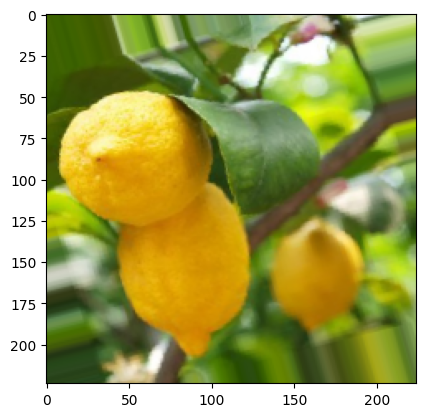

In [14]:
# check images
images, labels = next(train_generator)
plt.imshow(images[0])
plt.show()

In [15]:
# build CNN
model = keras.Sequential([
    # 5 convolutional layers/3 pooling layers/regularization
    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(256, (3,3), activation = 'relu'),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(512, (3,3), activation = 'relu'),
    keras.layers.BatchNormalization(),

    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dropout(0.5), 
    keras.layers.Dense(train_generator.num_classes,activation="softmax")

])

2025-11-02 17:07:34.146290: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-11-02 17:07:34.146504: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-11-02 17:07:34.146890: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-11-02 17:07:34.147187: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-02 17:07:34.147551: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [30]:
# prepare model for training
model.compile(
    optimizer = 'adam', # controls how fast/what direction model learns (adjust weights to minimize loss)
    loss = 'categorical_crossentropy', # compares predicted probabilities to [0,1] (higher loss = worse prediction)
    metrics = ['accuracy'] # tracks accuracy (how many predictions were correct)
)

# training model
history = model.fit(
    train_generator,
    validation_data = val_generator, # how well model generalizes
    epochs = 10, # goes through training 10x
    verbose = 1
)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.5544 - loss: 2.9029 - val_accuracy: 0.5014 - val_loss: 2.5544
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.5541 - loss: 4.6484 - val_accuracy: 0.3846 - val_loss: 2.4727
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.6100 - loss: 2.9657 - val_accuracy: 0.6667 - val_loss: 1.8036
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.6485 - loss: 1.1991 - val_accuracy: 0.6667 - val_loss: 0.8901
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.6748 - loss: 0.8134 - val_accuracy: 0.5812 - val_loss: 0.6535
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.6604 - loss: 0.7647 - val_accuracy: 0.7009 - val_loss: 0.8872
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.6998 - loss: 0.6615 - val_accuracy: 0.6296 - val_loss: 0.6676
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.7050 - loss: 0.6288 - val_accuracy: 0.7236 - v

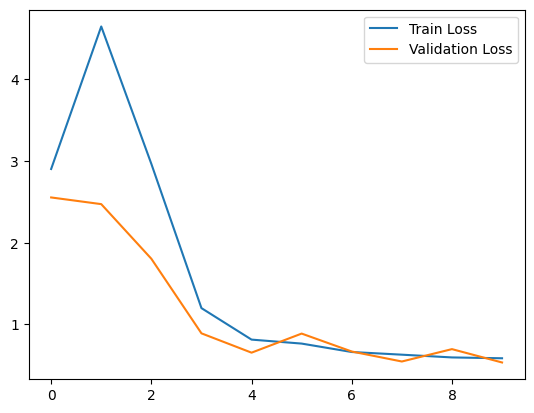

In [31]:
# plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

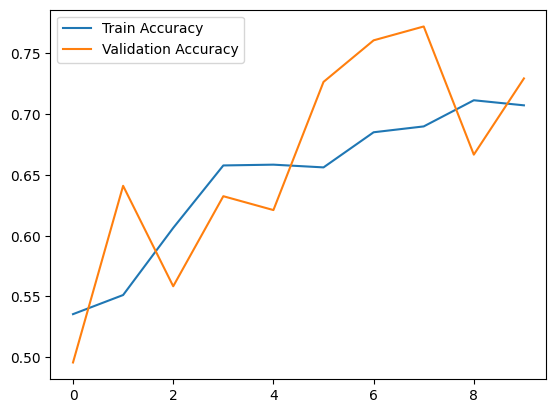

In [15]:
# plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [17]:
test_generator = test_datagen.flow_from_directory(
    dataset_path + '/test',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False  
)


Found 359 images belonging to 2 classes.


In [18]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 672ms/step - accuracy: 0.7270 - loss: 0.5257
Test Loss: 0.526
Test Accuracy: 0.727


In [18]:
# load pretrained MobileNetV2 without classification head
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,          # exclude original ImageNet classifier
    weights='imagenet'          # load pretrained ImageNet weights
)

base_model.trainable = False

In [19]:
model_tl = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(train_generator.num_classes, activation='softmax')
])


In [27]:
model_tl.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_tl = model_tl.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    verbose=1
)

Epoch 1/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 96s 900ms/step - accuracy: 0.7512 - loss: 0.5943 - val_accuracy: 0.9088 - val_loss: 0.1981
Epoch 2/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 88s 895ms/step - accuracy: 0.8514 - loss: 0.3626 - val_accuracy: 0.9487 - val_loss: 0.1307
Epoch 3/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 88s 895ms/step - accuracy: 0.8835 - loss: 0.3048 - val_accuracy: 0.9630 - val_loss: 0.1258
Epoch 4/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 85s 871ms/step - accuracy: 0.8918 - loss: 0.2713 - val_accuracy: 0.9630 - val_loss: 0.1013
Epoch 5/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 88s 891ms/step - accuracy: 0.9079 - loss: 0.2421 - val_accuracy: 0.9687 - val_loss: 0.1017


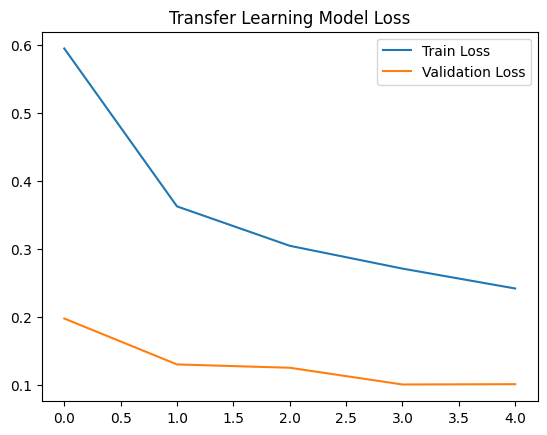

In [28]:
# plot loss
plt.plot(history_tl.history['loss'], label='Train Loss')
plt.plot(history_tl.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Model Loss')
plt.legend()
plt.show()

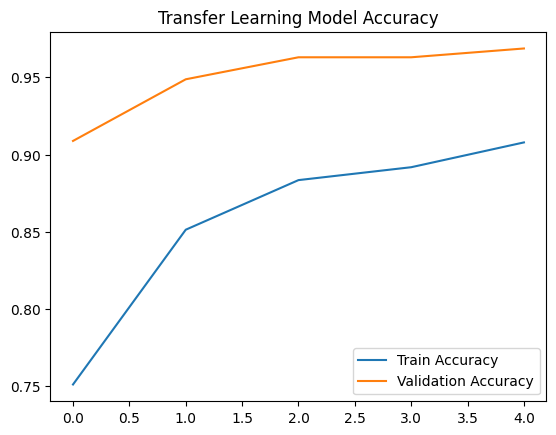

In [29]:
# plot loss
plt.plot(history_tl.history['accuracy'], label='Train Accuracy')
plt.plot(history_tl.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Model Accuracy')
plt.legend()
plt.show()

In [30]:
test_loss, test_acc = model_tl.evaluate(test_generator)
print(f"Test Loss: {test_loss:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 825ms/step - accuracy: 0.9666 - loss: 0.1020
Test Loss: 0.102
Test Accuracy: 0.967


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
CNN Prediction: veggies
TL Prediction: fruits


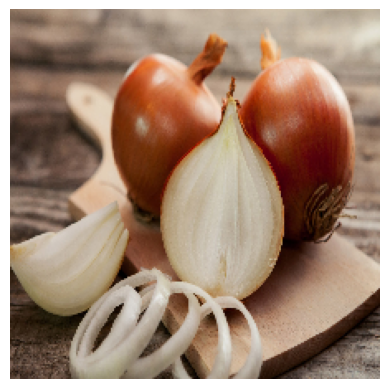

In [36]:
from tensorflow.keras.preprocessing import image

img_path = '/Users/jaimesong/Desktop/cpsc393/Assignment3/fruitVSVeg/test/veggies/onion/image_4.jpg'

img = image.load_img(img_path, target_size=(224,224))
img_array = np.expand_dims(np.array(img)/255.0, axis=0)

cnn_pred = model.predict(img_array)
tl_pred = model_tl.predict(img_array)

classes = list(train_generator.class_indices.keys())

print("CNN Prediction:", classes[np.argmax(cnn_pred)])
print("TL Prediction:", classes[np.argmax(tl_pred)])

plt.imshow(img)
plt.axis('off')
plt.show()


